# 와인 품질 분류 데이터
* [데이터 출처](https://dacon.io/competitions/open/235610/data)

## 데이터 해석
* index 구분자
* quality 품질
* fixed acidity 산도
* volatile acidity 휘발성산
* citric acid 시트르산
* residual sugar 잔당 : 발효 후 와인 속에 남아있는 당분
* chlorides 염화물
* free sulfur dioxide 독립 이산화황
* total sulfur dioxide 총 이산화황
* density 밀도
* pH 수소이온농도
* sulphates 황산염
* alcohol 도수
* type 종류

# load data & library 

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
# df = pd.read_csv("../data/MiniP3/WineQT.csv")
# df.shape

In [68]:
train = pd.read_csv("../data/MiniP3/train.csv", index_col="index")
print(train.shape)
train.head()

(5497, 13)


,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
index,,,,,,,,,,,,,
0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white
1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red
2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white
3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,white
4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,white


In [69]:
test = pd.read_csv("../data/MiniP3/test.csv", index_col="index")
print(test.shape)
test.head()

(1000, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
index,,,,,,,,,,,,
0,9.0,0.31,0.48,6.6,0.043,11.0,73.0,0.99380,2.90,0.38,11.6,white
1,13.3,0.43,0.58,1.9,0.070,15.0,40.0,1.00040,3.06,0.49,9.0,red
2,6.5,0.28,0.27,5.2,0.040,44.0,179.0,0.99480,3.19,0.69,9.4,white
3,7.2,0.15,0.39,1.8,0.043,21.0,159.0,0.99480,3.52,0.47,10.0,white
4,6.8,0.26,0.26,2.0,0.019,23.5,72.0,0.99041,3.16,0.47,11.8,white


# 데이터 타입과 결측치 조회

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5497 entries, 0 to 5496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   quality               5497 non-null   int64  
 1   fixed acidity         5497 non-null   float64
 2   volatile acidity      5497 non-null   float64
 3   citric acid           5497 non-null   float64
 4   residual sugar        5497 non-null   float64
 5   chlorides             5497 non-null   float64
 6   free sulfur dioxide   5497 non-null   float64
 7   total sulfur dioxide  5497 non-null   float64
 8   density               5497 non-null   float64
 9   pH                    5497 non-null   float64
 10  sulphates             5497 non-null   float64
 11  alcohol               5497 non-null   float64
 12  type                  5497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 601.2+ KB


In [7]:
train.isnull().sum()

quality                 0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
type                    0
dtype: int64

In [8]:
test.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
type                    0
dtype: int64

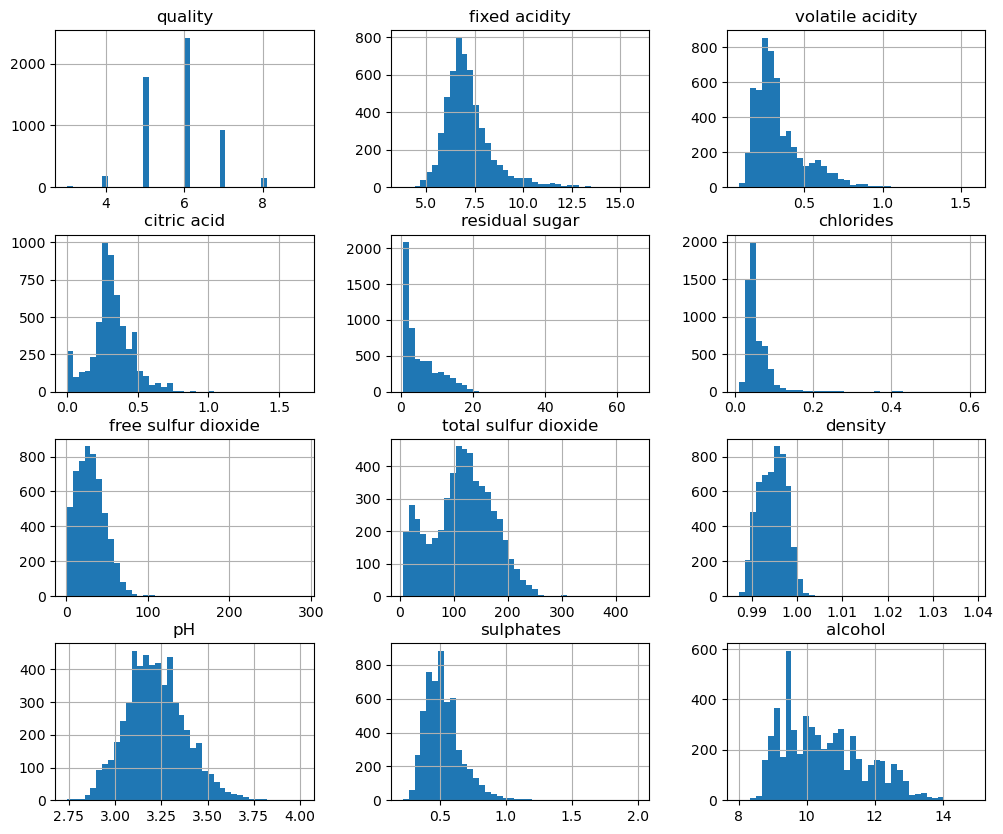

In [9]:
train.hist(figsize=(12, 10), bins=40);

# 와인 등급에 영향을 끼치는 요소
* 관련 지식 전무
* 상관계수를 이용하여 확인해보자

In [10]:
train.corr()

,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,1.000000,-0.076506,-0.261557,0.079157,-0.032848,-0.198148,0.055574,-0.039732,-0.299831,0.017931,0.042068,0.439615
fixed acidity,-0.076506,1.000000,0.210180,0.326992,-0.112544,0.303307,-0.277079,-0.323845,0.452161,-0.250462,0.300979,-0.096274
volatile acidity,-0.261557,0.210180,1.000000,-0.377986,-0.192677,0.385431,-0.352572,-0.418535,0.266759,0.264130,0.225174,-0.032897
citric acid,0.079157,0.326992,-0.377986,1.000000,0.135160,0.029121,0.129496,0.190955,0.088400,-0.322100,0.049013,-0.005376
residual sugar,-0.032848,-0.112544,-0.192677,0.135160,1.000000,-0.130339,0.396018,0.494788,0.557183,-0.259673,-0.182275,-0.361457
chlorides,-0.198148,0.303307,0.385431,0.029121,-0.130339,1.000000,-0.193143,-0.281654,0.364200,0.046937,0.400354,-0.259774
free sulfur dioxide,0.055574,-0.277079,-0.352572,0.129496,0.396018,-0.193143,1.000000,0.716829,0.027270,-0.145586,-0.189390,-0.182321
total sulfur dioxide,-0.039732,-0.323845,-0.418535,0.190955,0.494788,-0.281654,0.716829,1.000000,0.039707,-0.234412,-0.272236,-0.271566
density,-0.299831,0.452161,0.266759,0.088400,0.557183,0.364200,0.027270,0.039707,1.000000,0.020047,0.261879,-0.688053
pH,0.017931,-0.250462,0.264130,-0.322100,-0.259673,0.046937,-0.145586,-0.234412,0.020047,1.000000,0.187392,0.114959


In [11]:
mask_train = np.triu(np.ones_like(train.corr()))
mask_train

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

<AxesSubplot:>

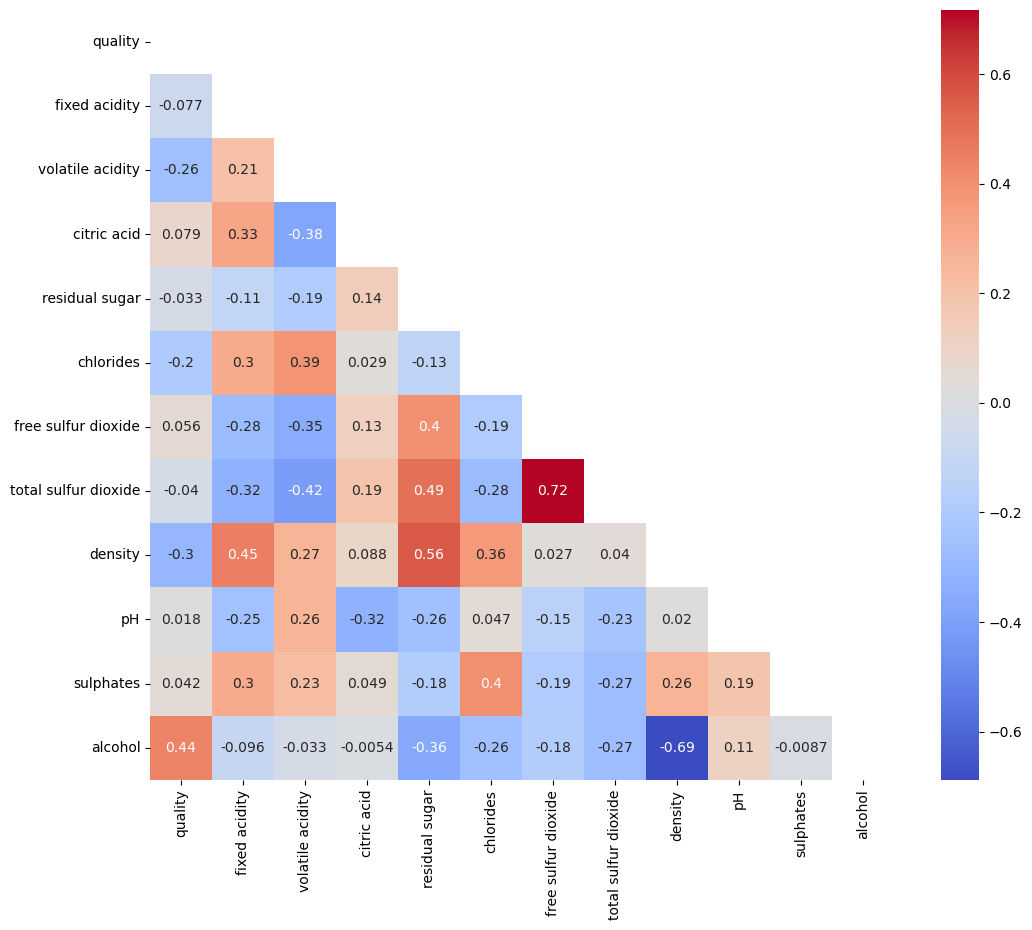

In [12]:
plt.figure(figsize=(12, 10))
sns.heatmap(train.corr(), mask=mask_train, cmap='coolwarm', annot=True)

In [13]:
mask_test = np.triu(np.ones_like(test.corr()))
mask_test

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

<AxesSubplot:>

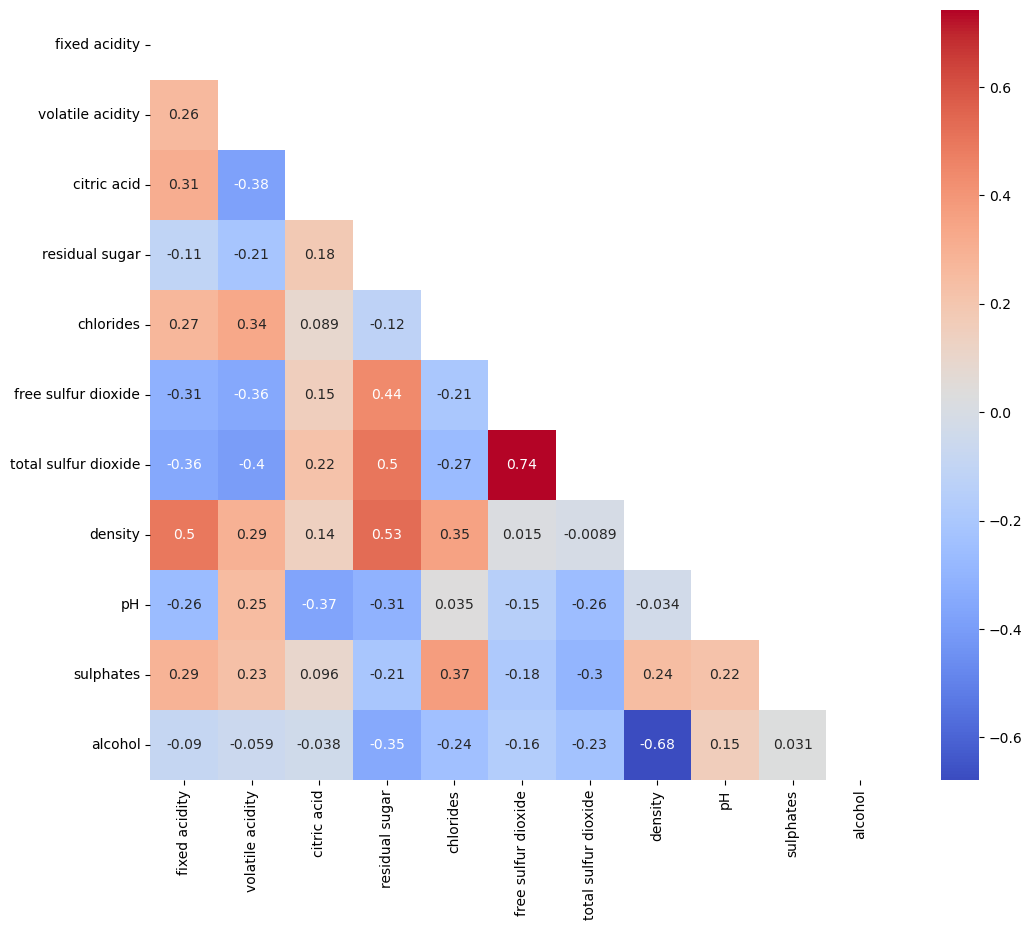

In [14]:
plt.figure(figsize=(12, 10))
sns.heatmap(test.corr(), mask=mask_test, cmap='coolwarm', annot=True)

In [15]:
cols = ['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'type']
cols

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'type']

# 파생변수

## sulfur dioxide
* dioxide = total sulfur dioxide + free sulfur dioxide

In [70]:
train["dioxide"] = train["total sulfur dioxide"] + train['free sulfur dioxide']
test["dioxide"] = test["total sulfur dioxide"] + test['free sulfur dioxide']

# featrues & label
* features로 quality와 상관계수 |0.1|보다 큰 것만 사용하자 

In [71]:
cols = ['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'density', 'pH', 'sulphates', 'alcohol', 'type', "dioxide"]

In [583]:
feature_names = ["volatile acidity", "chlorides", "density", "alcohol", "type", "dioxide"]
feature_names

['volatile acidity', 'chlorides', 'density', 'alcohol', 'type', 'dioxide']

In [18]:
label = 'quality'
label

'quality'

# train & test

In [72]:
X_train = train[cols]

# type의 [white, red]를 one-hot-encoding
X_train = pd.get_dummies(data=X_train, columns=["type"], prefix='type')
X_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,density,pH,sulphates,alcohol,dioxide,type_red,type_white
index,,,,,,,,,,,,
0,5.6,0.695,0.06,6.8,0.042,0.99432,3.44,0.44,10.2,93.0,0,1
1,8.8,0.610,0.14,2.4,0.067,0.99690,3.19,0.59,9.5,52.0,1,0
2,7.9,0.210,0.39,2.0,0.057,0.99176,3.05,0.52,10.9,159.0,0,1
3,7.0,0.210,0.31,6.0,0.046,0.99390,3.26,0.50,10.8,137.0,0,1
4,7.8,0.400,0.26,9.5,0.059,0.99550,3.04,0.43,10.9,210.0,0,1


In [73]:
y_train = train[label]
y_train.head()

index
0    5
1    5
2    5
3    6
4    6
Name: quality, dtype: int64

In [77]:
X_test = test[cols]
X_test.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,density,pH,sulphates,alcohol,type,dioxide
index,,,,,,,,,,,
0,9.0,0.31,0.48,6.6,0.043,0.99380,2.90,0.38,11.6,white,84.0
1,13.3,0.43,0.58,1.9,0.070,1.00040,3.06,0.49,9.0,red,55.0
2,6.5,0.28,0.27,5.2,0.040,0.99480,3.19,0.69,9.4,white,223.0
3,7.2,0.15,0.39,1.8,0.043,0.99480,3.52,0.47,10.0,white,180.0
4,6.8,0.26,0.26,2.0,0.019,0.99041,3.16,0.47,11.8,white,95.5


In [78]:
X_test = pd.get_dummies(data=X_test, columns=["type"], prefix='type')
X_test.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,density,pH,sulphates,alcohol,dioxide,type_red,type_white
index,,,,,,,,,,,,
0,9.0,0.31,0.48,6.6,0.043,0.99380,2.90,0.38,11.6,84.0,0,1
1,13.3,0.43,0.58,1.9,0.070,1.00040,3.06,0.49,9.0,55.0,1,0
2,6.5,0.28,0.27,5.2,0.040,0.99480,3.19,0.69,9.4,223.0,0,1
3,7.2,0.15,0.39,1.8,0.043,0.99480,3.52,0.47,10.0,180.0,0,1
4,6.8,0.26,0.26,2.0,0.019,0.99041,3.16,0.47,11.8,95.5,0,1


# ML
* 일단 하이퍼 파라미터 설정 없이 진행 

In [721]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=17, max_features=0.7, min_samples_leaf=3)
model

DecisionTreeClassifier(max_depth=17, max_features=0.7, min_samples_leaf=3)

In [722]:
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=17, max_features=0.7, min_samples_leaf=3)

In [723]:
from sklearn.model_selection import cross_val_predict

y_valid_predict = cross_val_predict(model, X_train, y_train, cv=5)

In [724]:
valid_accuracy = (y_train == y_valid_predict).mean()
valid_accuracy

0.5530289248681098

# Random Forest

In [98]:
from sklearn.ensemble import RandomForestClassifier

Forest_model = RandomForestClassifier(n_jobs=-1, max_features=0.8, max_depth=10, min_samples_leaf=3,
                                      n_estimators=500, criterion="log_loss")

In [99]:
y_valid_predict = cross_val_predict(Forest_model, X_train, y_train, cv=5)

In [100]:
score = (y_train == y_valid_predict).mean()
score

0.625068219028561

In [101]:
y_predict = model.predict(X_test)

# feature importance 시각화

<AxesSubplot:>

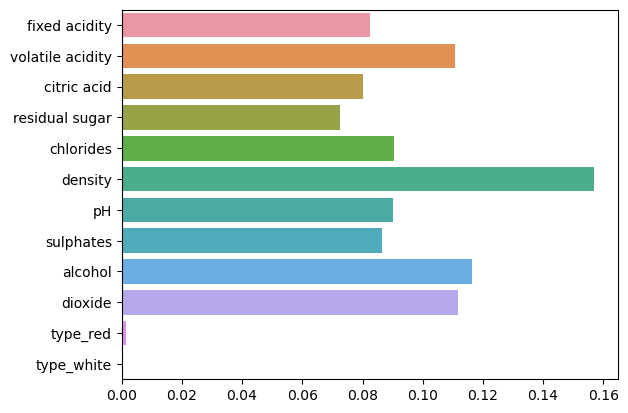

In [644]:
sns.barplot(x=model.feature_importances_, y=model.feature_names_in_)

# GridSearch

In [645]:
from sklearn.model_selection import GridSearchCV

max_depth = list(range(3, 20, 2))
max_features = [0.3, 0.5, 0.7, 0.8, 0.9]
min_samples_leaf = [1, 2, 3, 4, 5]

parameters = {"max_depth":max_depth, "max_features":max_features, "min_samples_leaf":min_samples_leaf}

In [646]:
parameters

{'max_depth': [3, 5, 7, 9, 11, 13, 15, 17, 19],
 'max_features': [0.3, 0.5, 0.7, 0.8, 0.9],
 'min_samples_leaf': [1, 2, 3, 4, 5]}

In [647]:
clf = GridSearchCV(model, parameters, n_jobs=-1, cv=5)
clf.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=17, max_features=0.7,
                                              min_samples_leaf=3),
             n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'max_features': [0.3, 0.5, 0.7, 0.8, 0.9],
                         'min_samples_leaf': [1, 2, 3, 4, 5]})

In [648]:
clf.best_estimator_

DecisionTreeClassifier(max_depth=19, max_features=0.7)

In [649]:
clf_rf = GridSearchCV(Forest_model, parameters, n_jobs=-1, cv=5)
clf_rf.fit(X_train, y_train)
clf_rf.best_estimator_

KeyboardInterrupt: 

# 똑같은 데이터 셋으로 다른 모델
* 마찬가지로 하이퍼 파라미터 설정 X
* 3~7점 정도의 성능 향상을 보임

## XGBoost

In [650]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_XGB = le.fit_transform(y_train)

In [651]:
import xgboost as xgb

model = xgb.XGBClassifier()
model.fit(X_train, y_train_XGB)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [652]:
from sklearn.model_selection import cross_val_predict

y_valid_predict = cross_val_predict(model, X_train, y_train_XGB, cv=5, n_jobs=-1)

In [653]:
valid_accuracy = (y_train_XGB == y_valid_predict).mean()
valid_accuracy

0.6459887211206112

## LGBM

In [90]:
from lightgbm import LGBMClassifier

In [111]:
model = LGBMClassifier(max_depth=9, feature_fraction=0.8, reg_lambda=0.2, n_estimators=400, 
                       reg_alpha=0.9)
model.fit(X_train, y_train)

LGBMClassifier(feature_fraction=0.8, max_depth=9, n_estimators=400,
               reg_alpha=0.9, reg_lambda=0.2)

In [108]:
from sklearn.model_selection import cross_val_predict

y_valid_predict = cross_val_predict(model, X_train, y_train, cv=5, n_jobs=-1)

In [109]:
valid_accuracy = (y_train == y_valid_predict).mean()
valid_accuracy

0.6468983081680917

In [112]:
y_predict = model.predict(X_test)

# 측정 지표의 표준화
[참고 블로그](https://data-marketing-bk.tistory.com/28) <br>
위 블로그 따라 표준화 후 모델 재실행

In [79]:
from sklearn.preprocessing import StandardScaler

In [80]:
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.fit_transform(X_test)

# ML
* 일단 하이퍼 파라미터 설정 없이 진행 

In [660]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=17, max_features=0.7, min_samples_leaf=3)
model

DecisionTreeClassifier(max_depth=17, max_features=0.7, min_samples_leaf=3)

In [661]:
model.fit(X_train_sc, y_train)

DecisionTreeClassifier(max_depth=17, max_features=0.7, min_samples_leaf=3)

In [662]:
from sklearn.model_selection import cross_val_predict

y_valid_predict = cross_val_predict(model, X_train_sc, y_train, cv=5)

In [663]:
valid_accuracy = (y_train == y_valid_predict).mean()
valid_accuracy

0.5455703110787702

# Random Forest

In [670]:
from sklearn.ensemble import RandomForestClassifier

Forest_model = RandomForestClassifier(n_jobs=-1, max_features=0.7, max_depth=15, n_estimators=200)

In [671]:
y_valid_predict = cross_val_predict(Forest_model, X_train_sc, y_train, cv=5, n_jobs=-1)

In [672]:
score = (y_train == y_valid_predict).mean()
score

0.6676368928506458

# GridSearch

In [529]:
from sklearn.model_selection import GridSearchCV

max_depth = list(range(3, 20, 2))
max_features = [0.3, 0.5, 0.7, 0.8, 0.9]
min_samples_leaf = [1, 2, 3, 4, 5]

parameters = {"max_depth":max_depth, "max_features":max_features, "min_samples_leaf":min_samples_leaf}

In [530]:
parameters

{'max_depth': [3, 5, 7, 9, 11, 13, 15, 17, 19],
 'max_features': [0.3, 0.5, 0.7, 0.8, 0.9],
 'min_samples_leaf': [1, 2, 3, 4, 5]}

In [531]:
clf = GridSearchCV(model, parameters, n_jobs=-1, cv=5)
clf.fit(X_train_sc, y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=17, max_features=0.7,
                                              min_samples_leaf=3),
             n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'max_features': [0.3, 0.5, 0.7, 0.8, 0.9],
                         'min_samples_leaf': [1, 2, 3, 4, 5]})

In [532]:
clf.best_estimator_

DecisionTreeClassifier(max_depth=19, max_features=0.5)

In [533]:
clf_rf = GridSearchCV(Forest_model, parameters, n_jobs=-1, cv=5)
clf_rf.fit(X_train_sc, y_train)
clf_rf.best_estimator_

KeyboardInterrupt: 

# RandomizedSearchCV

In [534]:
np.random.randint(3, 20, 10)

array([ 3,  6,  3, 11,  9,  7,  8,  8,  3, 15])

In [535]:
np.random.uniform(0.5, 1, 10)

array([0.70528323, 0.86050136, 0.69408531, 0.51583917, 0.5210171 ,
       0.68656072, 0.7748492 , 0.57623629, 0.54743623, 0.50969802])

In [667]:
from sklearn.model_selection import RandomizedSearchCV

param_distributions = {"max_depth": np.random.randint(3, 20, 10),
                      "max_features": np.random.uniform(0.5, 1, 10)}

clfr = RandomizedSearchCV(Forest_model, param_distributions=param_distributions, n_iter=10)
clfr.fit(X_train_sc, y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(max_depth=19,
                                                    max_features=0.7,
                                                    n_estimators=200,
                                                    n_jobs=-1),
                   param_distributions={'max_depth': array([ 8,  8,  8,  9, 10, 10,  3,  9, 16, 15]),
                                        'max_features': array([0.55234359, 0.5309708 , 0.68391227, 0.65553782, 0.93844827,
       0.81312486, 0.80442674, 0.78779658, 0.83713445, 0.5173847 ])})

In [668]:
clfr.best_params_

{'max_features': 0.6555378245201667, 'max_depth': 15}

In [669]:
clfr.best_score_

0.669452229299363

# 똑같은 데이터 셋으로 다른 모델
* 마찬가지로 하이퍼 파라미터 설정 X
* 3~7점 정도의 성능 향상을 보임

## XGBoost

In [673]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_XGB = le.fit_transform(y_train)

In [674]:
import xgboost as xgb

model = xgb.XGBClassifier()
model.fit(X_train_sc, y_train_XGB)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [675]:
from sklearn.model_selection import cross_val_predict

y_valid_predict = cross_val_predict(model, X_train_sc, y_train_XGB, cv=5, n_jobs=-1)

In [676]:
valid_accuracy = (y_train_XGB == y_valid_predict).mean()
valid_accuracy

0.6459887211206112

## LGBM

In [677]:
from lightgbm import LGBMClassifier

In [678]:
model = LGBMClassifier()
model.fit(X_train_sc, y_train)

LGBMClassifier()

In [679]:
from sklearn.model_selection import cross_val_predict

y_valid_predict = cross_val_predict(model, X_train_sc, y_train, cv=5, n_jobs=-1)

In [680]:
valid_accuracy = (y_train == y_valid_predict).mean()
valid_accuracy

0.6485355648535565

# feature 재지정하기 위해 시각화

In [589]:
X_train.describe()

,volatile acidity,chlorides,density,alcohol,dioxide,type_red,type_white
count,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000
mean,0.338163,0.055808,0.994673,10.504918,145.984173,0.243405,0.756595
std,0.163224,0.034653,0.003014,1.194524,70.049821,0.429177,0.429177
min,0.080000,0.009000,0.987110,8.000000,9.000000,0.000000,0.000000
25%,0.230000,0.038000,0.992300,9.500000,98.000000,0.000000,1.000000
50%,0.290000,0.047000,0.994800,10.300000,148.000000,0.000000,1.000000
75%,0.400000,0.064000,0.996930,11.300000,195.000000,0.000000,1.000000
max,1.580000,0.610000,1.038980,14.900000,729.000000,1.000000,1.000000


In [46]:
col_list = X_train.columns.tolist()
col_list

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'dioxide',
 'type_red',
 'type_white']

<AxesSubplot:xlabel='quality', ylabel='dioxide'>

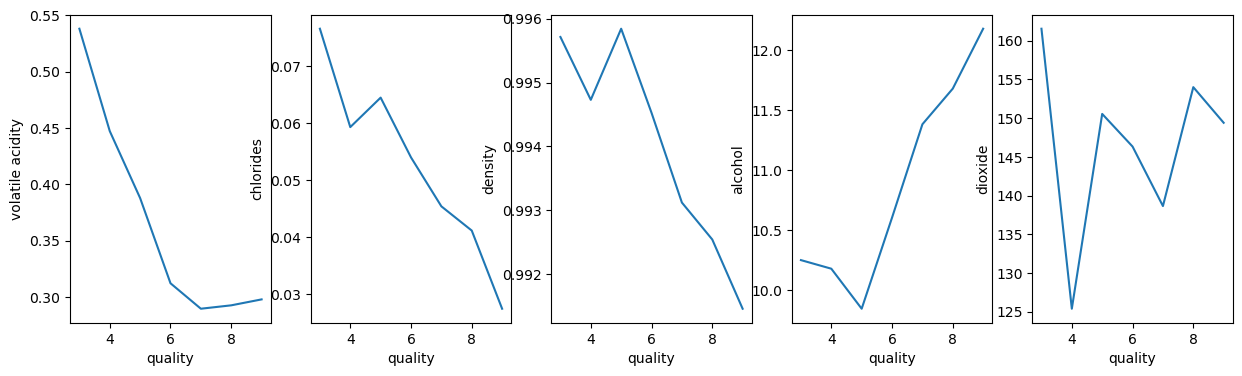

In [600]:
fig, ax = plt.subplots(1, 5, figsize=(15, 4))
sns.lineplot(data=train, x="quality", y=col_list[0], errorbar=None, ax=ax[0])
sns.lineplot(data=train, x="quality", y=col_list[1], errorbar=None, ax=ax[1])
sns.lineplot(data=train, x="quality", y=col_list[2], errorbar=None, ax=ax[2])
sns.lineplot(data=train, x="quality", y=col_list[3], errorbar=None, ax=ax[3])
sns.lineplot(data=train, x="quality", y=col_list[4], errorbar=None, ax=ax[4])
# sns.lineplot(data=train, x="quality", y=col_list[5], errorbar=None, ax=ax[1, 1])
# sns.lineplot(data=train, x="quality", y=col_list[6], errorbar=None, ax=ax[1, 2])
# sns.lineplot(data=train, x="quality", y=col_list[8], errorbar=None, ax=ax[1, 3])
# sns.lineplot(data=train, x="quality", y=col_list[9], errorbar=None, ax=ax[2, 0])
# sns.lineplot(data=train, x="quality", y=col_list[10], errorbar=None, ax=ax[2, 1])
# sns.lineplot(data=train, x="quality", y=col_list[11], errorbar=None, ax=ax[2, 2])
# sns.lineplot(data=train, x="quality", y=col_list[12], errorbar=None, ax=ax[2, 3])

<AxesSubplot:xlabel='dioxide'>

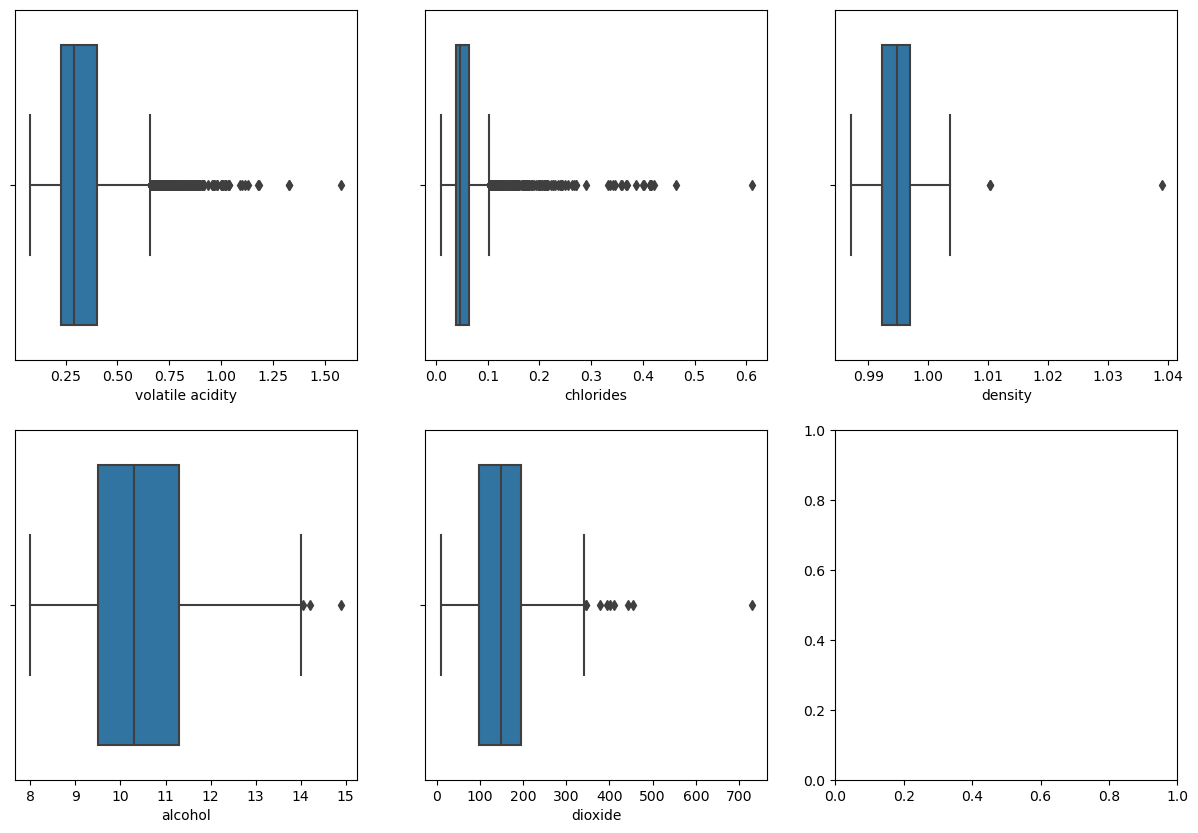

In [603]:
fig, ax = plt.subplots(2, 3, figsize=(15, 10))
sns.boxplot(data=X_train, x=col_list[0], ax=ax[0, 0])
sns.boxplot(data=X_train, x=col_list[1], ax=ax[0, 1])
sns.boxplot(data=X_train, x=col_list[2], ax=ax[0, 2])
sns.boxplot(data=X_train, x=col_list[3], ax=ax[1, 0])
sns.boxplot(data=X_train, x=col_list[4], ax=ax[1, 1])
# sns.boxplot(data=train, x=col_list[6], ax=ax[5])
# sns.boxplot(data=train, x=col_list[7], ax=ax[6])
# sns.boxplot(data=train, x=col_list[8], ax=ax[7])
# sns.boxplot(data=train, x=col_list[9], ax=ax[8])
# sns.boxplot(data=train, x=col_list[10], ax=ax[9])
# sns.boxplot(data=train, x=col_list[11], ax=ax[10])
# sns.boxplot(data=train, x=col_list[12], ax=ax[11])

# 전처리
* 3분위수 이상의 값을 전부 중앙값으로 대체해보자

In [47]:
cols

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'type',
 'dioxide']

<AxesSubplot:xlabel='dioxide'>

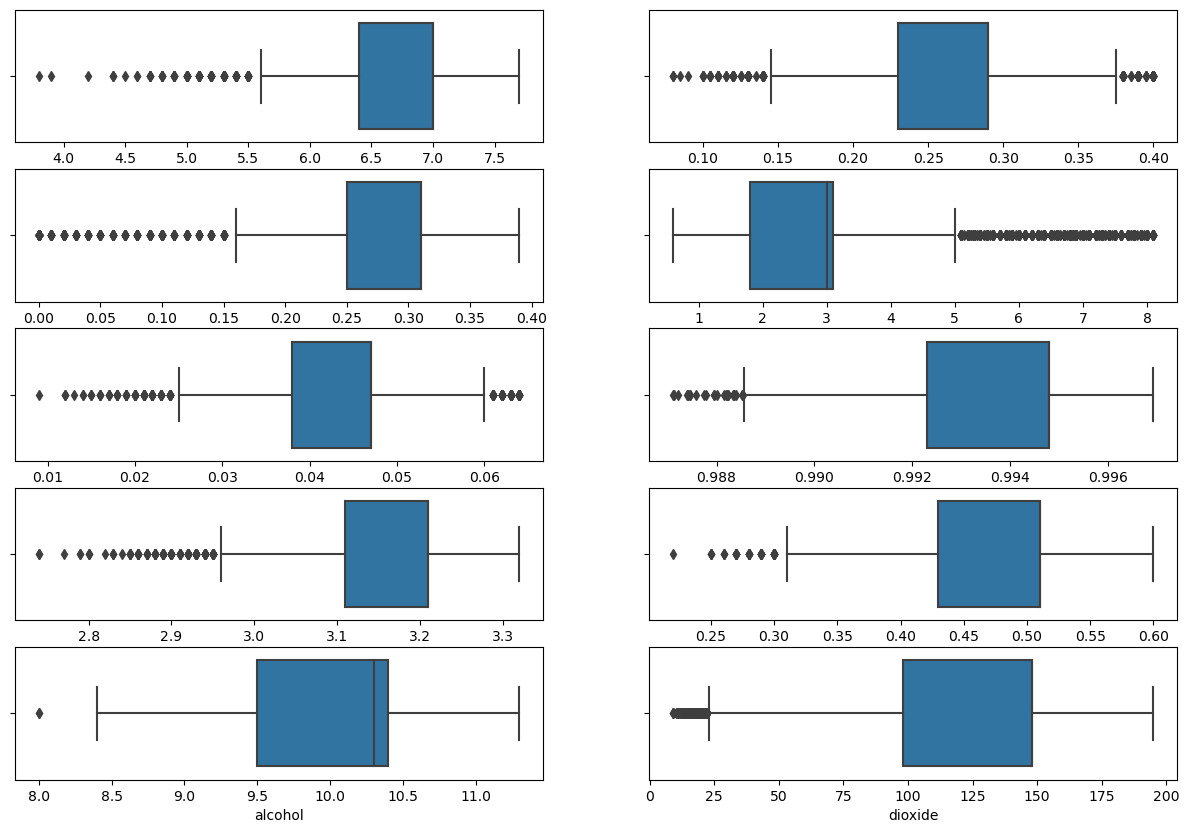

In [50]:
fig, ax = plt.subplots(5, 2, figsize=(15, 10))
sns.boxplot(data=X_train, x=cols[0], ax=ax[0, 0])
sns.boxplot(data=X_train, x=cols[1], ax=ax[0, 1])
sns.boxplot(data=X_train, x=cols[2], ax=ax[1, 0])
sns.boxplot(data=X_train, x=cols[3], ax=ax[1, 1])
sns.boxplot(data=X_train, x=cols[4], ax=ax[2, 0])
sns.boxplot(data=X_train, x=cols[5], ax=ax[2, 1])
sns.boxplot(data=X_train, x=cols[6], ax=ax[3, 0])
sns.boxplot(data=X_train, x=cols[7], ax=ax[3, 1])
sns.boxplot(data=X_train, x=cols[8], ax=ax[4, 0])
sns.boxplot(data=X_train, x=cols[10], ax=ax[4, 1])

In [49]:
for col in cols:
    if col in ["type"]:
        continue
    condition = X_train[col].describe()["75%"] < X_train[col]
    median = X_train[col].describe()["50%"]
    X_train.loc[condition, col] = median

In [576]:
train.describe()

,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,dioxide
count,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000
mean,5.818992,6.747808,0.268050,0.271110,3.084182,0.043616,24.230853,98.550755,0.993764,3.165114,0.478081,10.036598,124.316718
std,0.870311,0.567499,0.061042,0.088068,1.768289,0.008760,9.665381,38.360809,0.002010,0.097437,0.070768,0.649500,46.782456
min,3.000000,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.740000,0.220000,8.000000,9.000000
25%,5.000000,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,78.000000,0.992300,3.110000,0.430000,9.500000,98.000000
50%,6.000000,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994800,3.210000,0.510000,10.300000,148.000000
75%,6.000000,7.000000,0.290000,0.310000,3.100000,0.047000,29.000000,118.000000,0.994800,3.210000,0.510000,10.400000,148.000000
max,9.000000,7.700000,0.400000,0.390000,8.100000,0.064000,41.000000,155.000000,0.996930,3.320000,0.600000,11.300000,195.000000


# 제출 파일

In [113]:
submit = pd.read_csv("../data/MiniP3/sample_submission.csv")
submit.head()

,index,quality
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


In [114]:
submit["quality"] = y_predict

In [115]:
submit.head()

,index,quality
0,0,5
1,1,6
2,2,6
3,3,5
4,4,6


In [116]:
submit.to_csv("../data/MiniP3/submission.csv", index=False)

In [117]:
pd.read_csv("../data/MiniP3/submission.csv").head()

,index,quality
0,0,5
1,1,6
2,2,6
3,3,5
4,4,6
